In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [9]:
titanic_data=pd.read_csv("titanic_dataset.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [10]:
len(titanic_data)

891

In [33]:
yes=titanic_data["Survived"] == "Yes"
titanic_data[yes]
df2=titanic_data[yes]
df2["Survived"] = "1"
no=titanic_data["Survived"] == "No"
titanic_data[no]
df1=titanic_data[no]
df1["Survived"] = "0"
titanic_data=pd.concat([df1, df2], ignore_index=True)
titanic_data.set_index('PassengerId', inplace=True)
titanic_data.sort_index(inplace=True)
titanic_data

C:\Users\Bilal\Anaconda3\envs\neural-network\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Bilal\Anaconda3\envs\neural-network\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Analysis Data

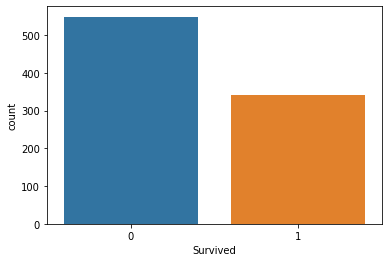

In [34]:
sns.countplot(x="Survived", data=titanic_data)

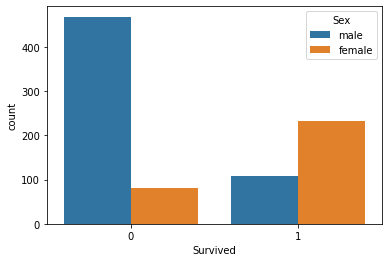

In [36]:
sns.countplot(x="Survived",  hue="Sex", data=titanic_data)

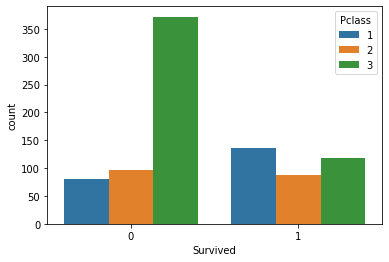

In [37]:
sns.countplot(x="Survived",  hue="Pclass", data=titanic_data)

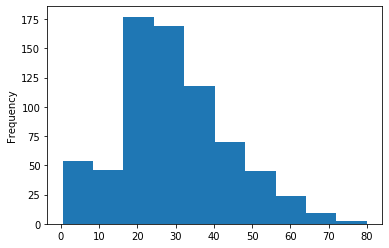

In [39]:
titanic_data["Age"].plot.hist()

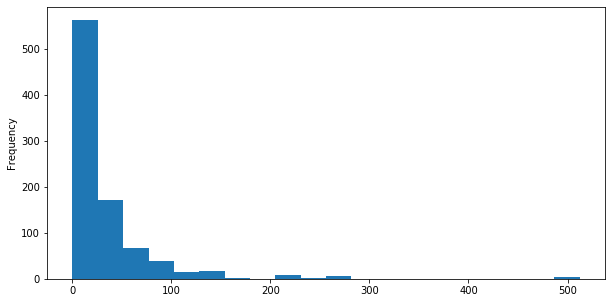

In [67]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10, 5))

In [66]:
len(titanic_data[titanic_data["Fare"]>20])

376

In [69]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null object
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 123.5+ KB


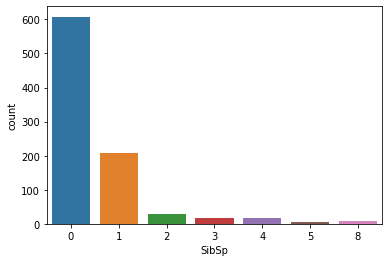

In [71]:
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [78]:
titanic_data.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [79]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

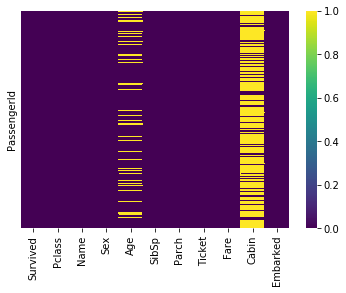

In [82]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

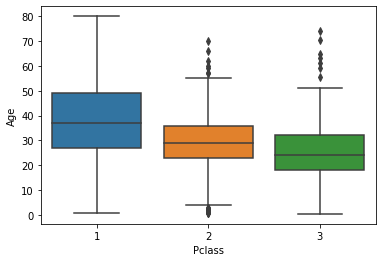

In [84]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [90]:
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.dropna(inplace=True)

KeyError: "['Cabin'] not found in axis"

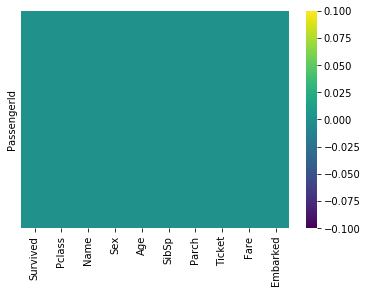

In [91]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

In [95]:
sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [97]:
embark=pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [98]:
Pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head()

,2,3
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,0
5,0,1


In [99]:
titanic_data=pd.concat([titanic_data, sex, embark, Pcl ], axis=1)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0


In [100]:
titanic_data.drop(["Sex", "Embarked", "Pclass", "Name", "Ticket"], axis=1, inplace=True)

In [101]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1
4,1,35.0,1,0,53.1000,0,0,1,0,0
5,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,39.0,0,5,29.1250,0,1,0,0,1
887,0,27.0,0,0,13.0000,1,0,1,1,0
888,1,19.0,0,0,30.0000,0,0,1,0,0


## Train Test Split

In [105]:
x=titanic_data.drop(["Survived"], axis=1)
y=titanic_data["Survived"]

In [110]:
from sklearn.model_selection import train_test_split 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
logmodel=LogisticRegression()

In [115]:
logmodel.fit(X_train, y_train)

C:\Users\Bilal\Anaconda3\envs\neural-network\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
prediction=logmodel.predict(X_test)

In [145]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df.head()

,Actual,Predicted
PassengerId,,
690,1,1
280,1,0
509,0,0
10,1,1
497,1,1


In [130]:
from sklearn.metrics import classification_report

In [146]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [147]:
confusion_matrix(y_test, prediction)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [148]:
accuracy_score(y_test, prediction)

0.7710280373831776

## My Own Predction

In [152]:
x_new=np.array([22.0, 1, 0, 7.2500, 1, 0, 1, 0, 1]).reshape((1, -1))
x_new

array([[22.  ,  1.  ,  0.  ,  7.25,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ]])

In [150]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1
4,1,35.0,1,0,53.1000,0,0,1,0,0
5,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,39.0,0,5,29.1250,0,1,0,0,1
887,0,27.0,0,0,13.0000,1,0,1,1,0
888,1,19.0,0,0,30.0000,0,0,1,0,0


In [154]:
y_new = logmodel.predict(x_new)
print(y_new)

['0']
